# Flu Shot Prediction Data Wrangling

## Imports:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()

'/Users/tom/Desktop/Springboard'

## Loading Data:

In [2]:
#Raw data is located in raw_data directory of project folder#
#Raw data exists in a train and test sets#
flu_train = pd.read_csv('../Capstone2-FluPrediction/raw_data/training_set_features.csv')
flu_test = pd.read_csv('../Capstone2-FluPrediction/raw_data/test_set_features.csv')
flu_train_label = pd.read_csv('../Capstone2-FluPrediction/raw_data/training_set_labels.csv')

In [3]:
flu_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [4]:
flu_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
flu_test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [6]:
flu_train_label.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


## Missing Data:

In [7]:
#Missing data from training set#
flu_train.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [8]:
#missing data from test set#
flu_test.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [9]:
#label set missing values#
flu_train_label.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [10]:
flu_train['opinion_h1n1_risk'].unique()

array([ 1.,  4.,  3.,  2.,  5., nan])

## Shifting ordinal data to begin at 0

In [11]:
flu_train2 = flu_train.copy()
flu_test2 = flu_test.copy()

In [12]:
def ordinal_1shift(df, columns):
    for c in columns:
        df[c] = df[c] - 1
    return df

column_lst = ['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
flu_train2 = ordinal_1shift(flu_train2, column_lst)
flu_test2 = ordinal_1shift(flu_test2, column_lst)

In [13]:
flu_train2['opinion_h1n1_risk'].unique()

array([ 0.,  3.,  2.,  1.,  4., nan])

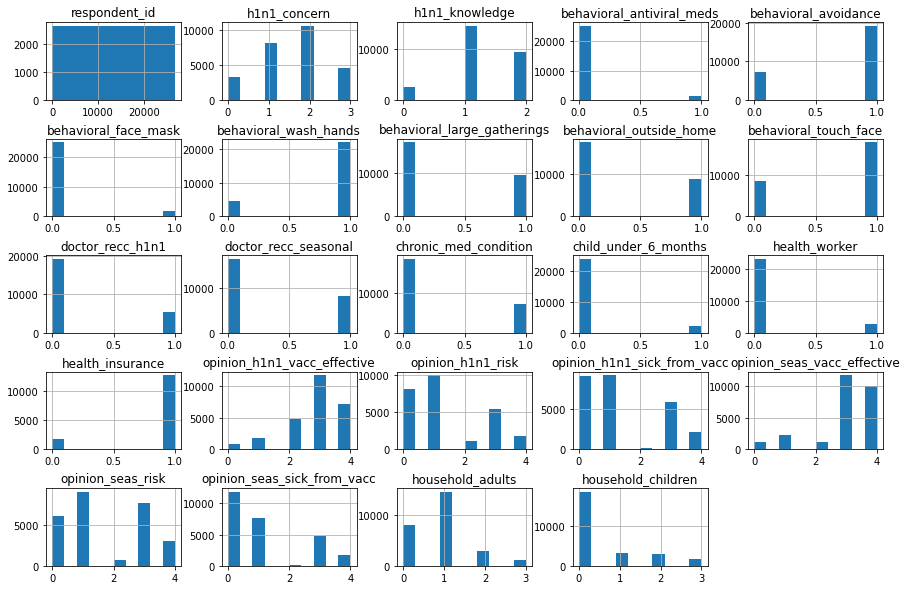

In [14]:
flu_train2.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

All data previously coded into numbers shown above. All values are integers, although dtype is float.

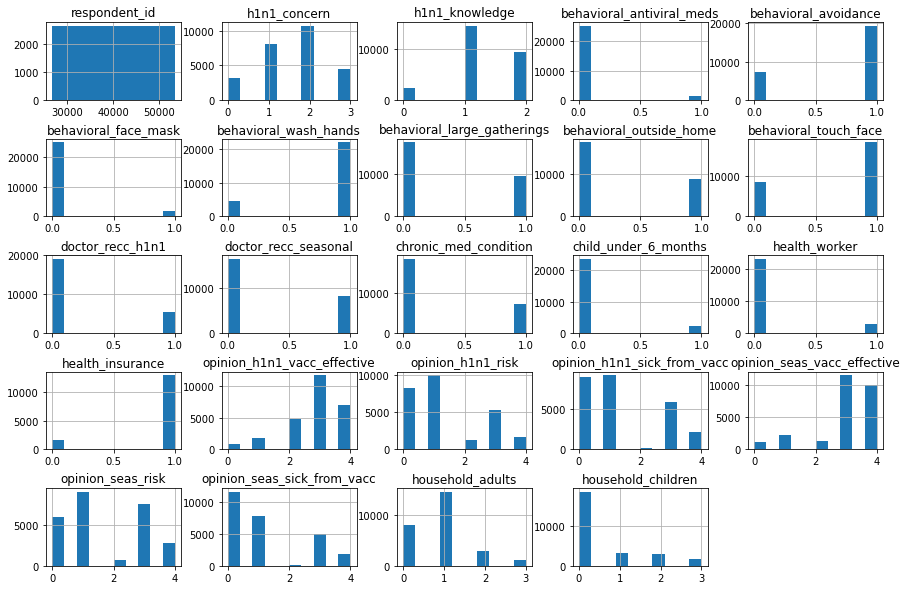

In [15]:
flu_test2.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

## Mappings for Categorical Data: 

In [16]:

mappings = {'age_group' : {'18 - 34 Years': 0, '35 - 44 Years': 1, '45 - 54 Years': 2, '55 - 64 Years': 3, '65+ Years': 4},
'education' : {'< 12 Years': 0, '12 Years': 1, 'Some College': 2, 'College Graduate': 3},
'income_poverty' : {'Below Poverty': 0, '<= $75,000, Above Poverty': 1, '> $75,000': 2},
'employment_status' : {'Unemployed': 0, 'Employed':1, 'Not in Labor Force': 2},


'rent_or_own' : {'Rent': 0, 'Own': 1},
'sex' : {'Female': 0, 'Male': 1},
'marital_status' : {'Not Married': 0, 'Married': 1},



'race': {'White': 1, 'Black': 2, 'Hispanic' : 3, 'Other or Multiple': 4},
'hhs_geo_region' : {'oxchjgsf':1, 'bhuqouqj':2, 'qufhixun':3, 'lrircsnp':4, 'atmpeygn':5,
       'lzgpxyit':6, 'fpwskwrf':7, 'mlyzmhmf':8, 'dqpwygqj':9, 'kbazzjca':10},
'census_msa': {'Non-MSA':1, 'MSA, Not Principle  City':2, 'MSA, Principle City':3},
'employment_industry' : {'pxcmvdjn':1, 'rucpziij':2, 'wxleyezf':3, 'saaquncn':4, 'xicduogh':5,
       'ldnlellj':6, 'wlfvacwt':7, 'nduyfdeo':8, 'fcxhlnwr':9, 'vjjrobsf':10,
       'arjwrbjb':11, 'atmlpfrs':12, 'msuufmds':13, 'xqicxuve':14, 'phxvnwax':15,
       'dotnnunm':16, 'mfikgejo':17, 'cfqqtusy':18, 'mcubkhph':19, 'haxffmxo':20,
       'qnlwzans':21},
'employment_occupation' : {'xgwztkwe':1, 'xtkaffoo':2, 'emcorrxb':3, 'vlluhbov':4, 'xqwwgdyp':5,
       'ccgxvspp':6, 'qxajmpny':7, 'kldqjyjy':8, 'mxkfnird':9, 'hfxkjkmi':10,
       'bxpfxfdn':11, 'ukymxvdu':12, 'cmhcxjea':13, 'haliazsg':14, 'dlvbwzss':15,
       'xzmlyyjv':16, 'oijqvulv':17, 'rcertsgn':18, 'tfqavkke':19, 'hodpvpew':20,
       'uqqtjvyb':21, 'pvmttkik':22, 'dcjcmpih':23}}

In [17]:
flu_train3 = flu_train2.copy()
flu_test3 = flu_train2.copy()

In [18]:
def remap(df, map_dict):
    for c in df.columns:
        if c in map_dict.keys():
            df[c].replace(map_dict[c], inplace=True)
    return df         
                          
flu_train3 = remap(flu_train3, mappings)
flu_test3 = remap(flu_test3, mappings)

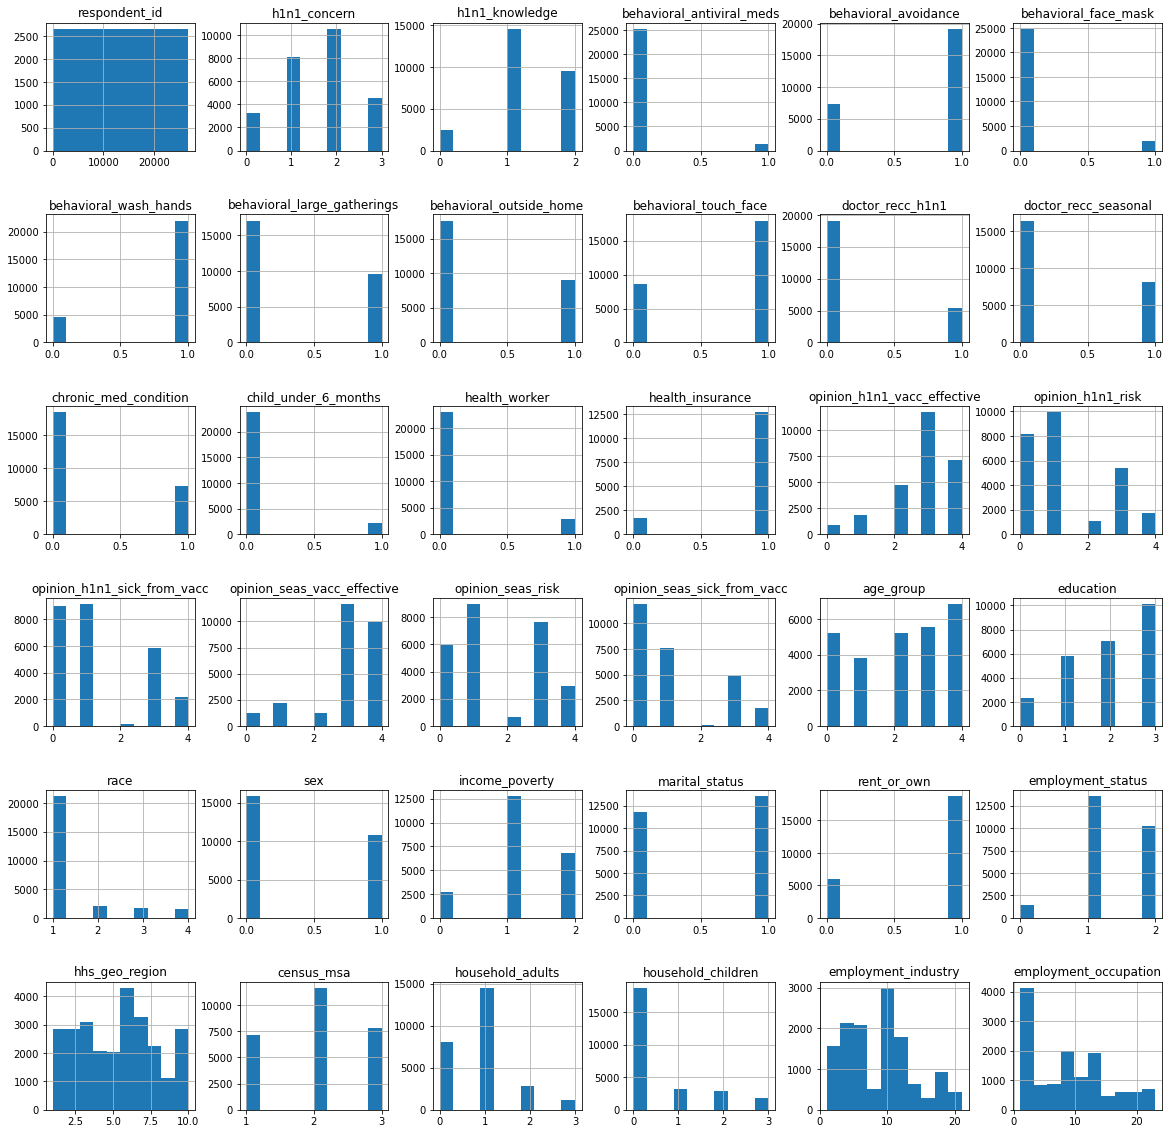

In [19]:
flu_train3.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

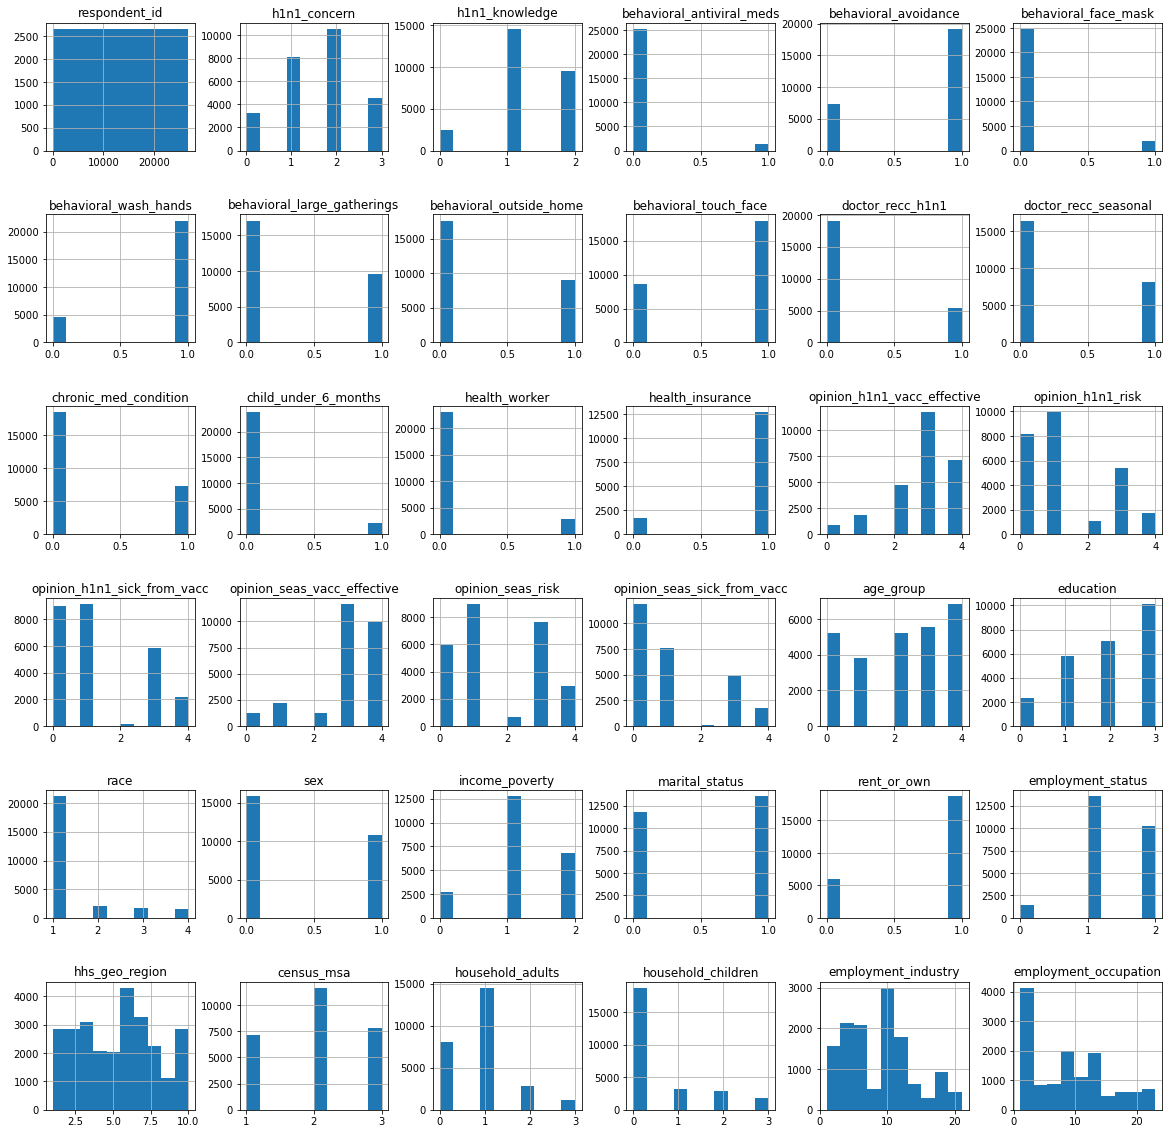

In [20]:
flu_test3.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

## Dropping Columns:

### Dropping health_insurance column:

In [24]:
#Exploring health_insurance column#
print(flu_train3['health_insurance'].value_counts())
print(flu_train3['health_insurance'].isnull().sum())

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64
12274


Around half of the values are missing and of the non-null objects, the vast majority are in the 1.0 (insured) catergory. There is very little useful information in this column.

## Filling NaN

In [19]:
flu_train_cln = flu_train3.fillna(-1)
flu_test_cln = flu_test3.fillna(-1)


In [20]:
flu_train_cln.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [34]:
flu_train3[flu_train3['health_worker'] == 1]['employment_industry'].value_counts()

9.0     1943
1.0       81
3.0       68
6.0       63
10.0      50
11.0      49
5.0       24
4.0       18
2.0       16
16.0      14
19.0      12
20.0      11
12.0      11
17.0      10
14.0       8
8.0        7
18.0       4
7.0        3
13.0       2
15.0       1
Name: employment_industry, dtype: int64

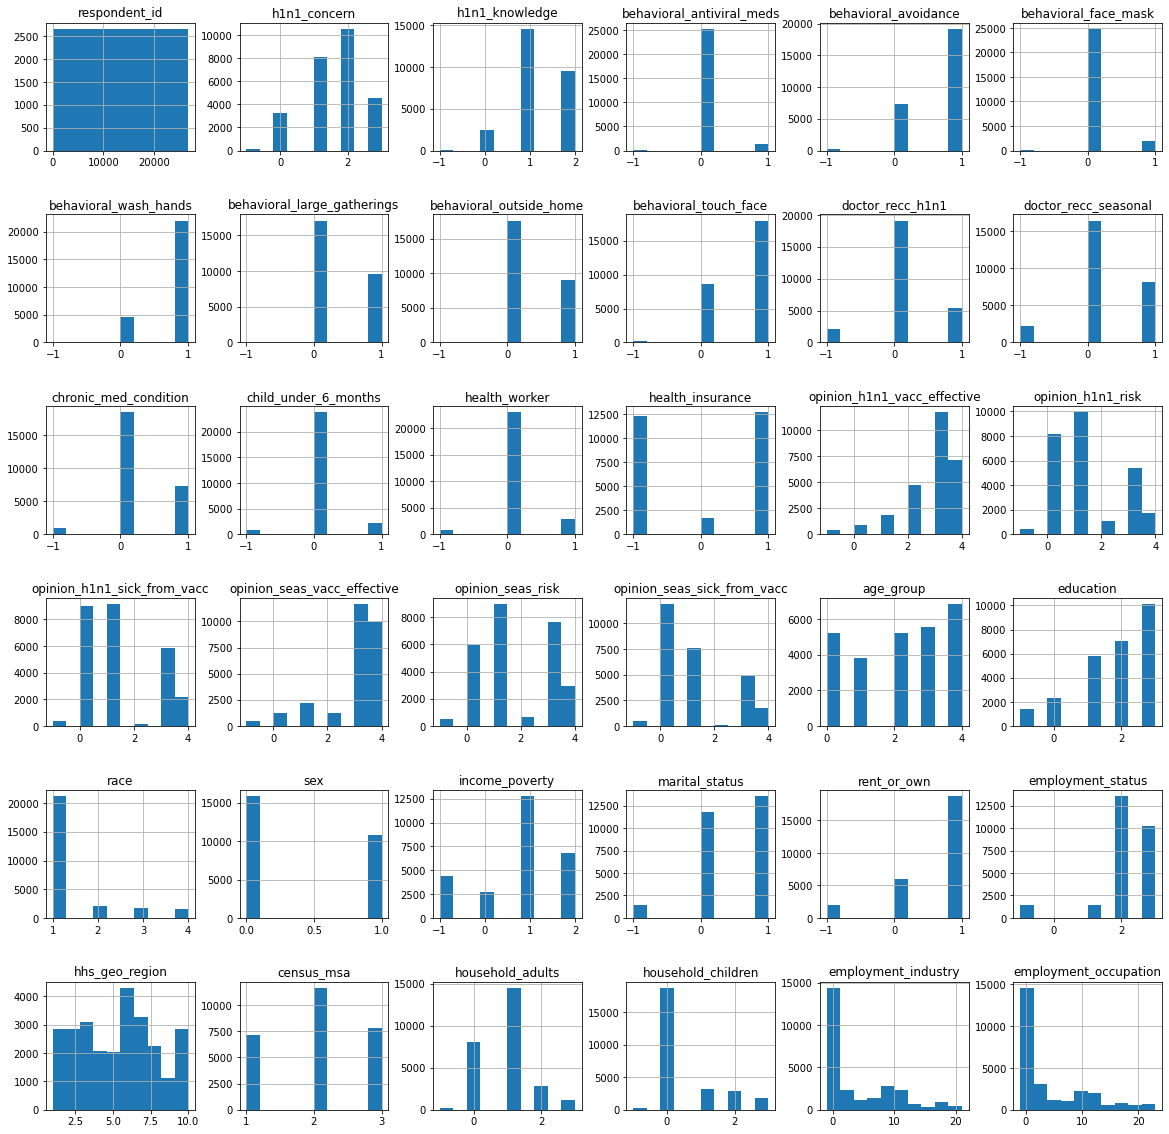

In [21]:
flu_train_cln.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);